In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    def __init__(self):
        self.b0 = None
        self.b1 = None
        self.cost_history = []
        self.steps = []
        self.err = []

    
    def check(self, X, Y):
        if isinstance(X, pd.DataFrame):
            X = pd.Series(X['0'])
        if isinstance(Y, pd.DataFrame):
            Y = pd.Series(Y['0'])
        return X, Y

    def error(self, X, Y):
        X, Y = self.check(X, Y)
        return np.mean((self.predict(X) - Y) ** 2) / 2

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        X, Y = self.check(X, Y)
        self.b0 = 0
        self.b1 = 0
        step = 0
        prev_cost = 0
        errors = []
        self.steps = []
        while step < max_steps:
            new_err = self.error(X, Y)
            errors.append(new_err)
            error = self.predict(X) - Y
            cost = self.error(X,Y)
            self.cost_history.append(cost)
            if abs(prev_cost - cost) < accuracy:
                print(f"Reached desired accuracy after {step} steps")
                break
            prev_cost = cost
            self.b0 -= alpha * np.mean(error)
            self.b1 -= alpha * np.mean(error * X)
            step += 1
            self.steps.append(step)
            if step == max_steps:
                print("Reached maximum number of steps")
            self.err = errors.copy()
        return self.steps, errors

    def predict(self, X):
        X, _ = self.check(X, None)
        return self.b0 + self.b1 * X

    def plot(self, X, Y):
        X, Y = self.check(X, Y)
        Y_pred = self.predict(X)
        plt.scatter(X, Y)
        plt.plot(X, Y_pred, color='red')
        plt.show()

    def plot_learning_curves(self):
        global var

        #plt.plot(self.cost_history, color='green')
        #if len(self.steps)!=len(self.err)
        plt.plot(self.steps,self.err[:len(self.steps)])
        plt.show()

In [3]:
# Загрузка данных
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

Reached desired accuracy after 2737 steps
error after gradient descent: 4.4961047667431675


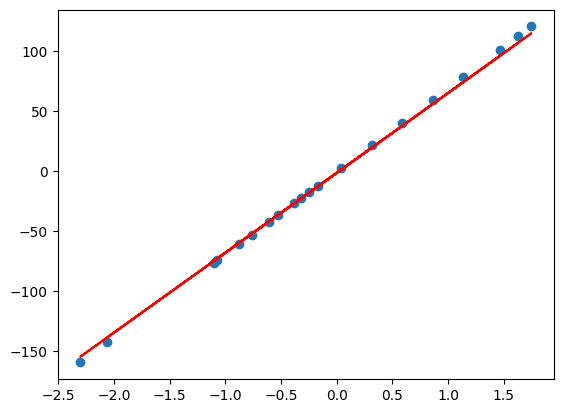

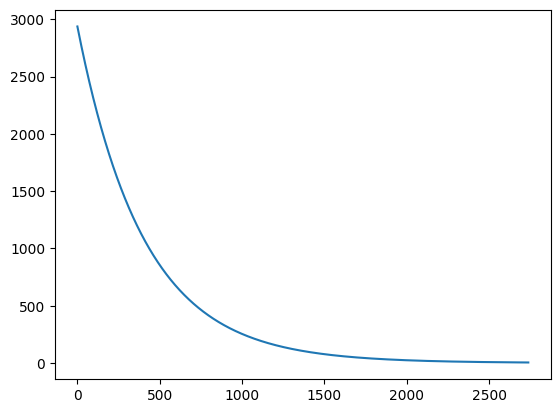

In [4]:
# Создание объекта модели
model = LinearRegression()

# Обучение модели
steps, errors = model.fit(x, y)

#Ошибки
J = model.error(x, y)
print("error after gradient descent:", J)

# Предсказание значений на тестовых данных
y_pred = model.predict(x)

# Построение графика
model.plot(x, y)

# Построение кривых обучения
model.plot_learning_curves()


Reached desired accuracy after 2737 steps
error after gradient descent: 4.4961047667431675


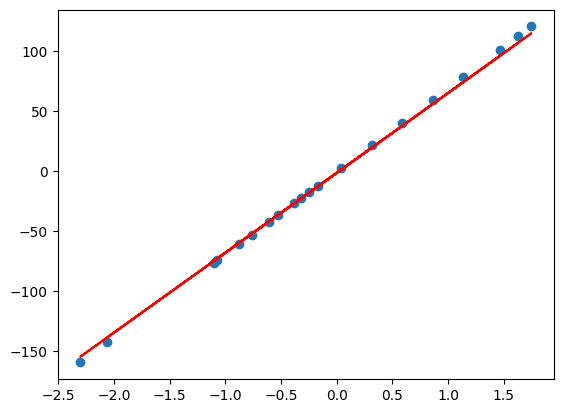

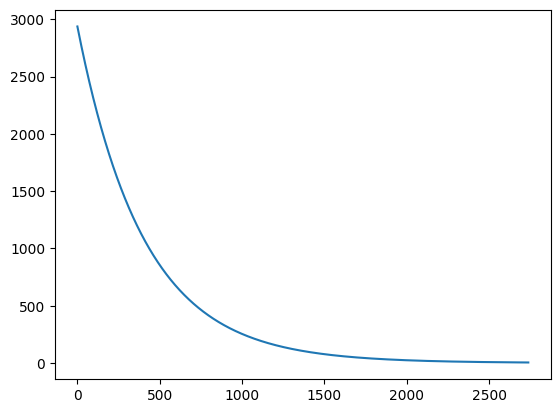

In [5]:
# Задание 1
hyp = LinearRegression()
hyp.b0 = 10
hyp.b1 = -5
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
hyp.plot(x, y)
hyp.plot_learning_curves()


Reached maximum number of steps
error after gradient descent: 3.2447951600173438e+63


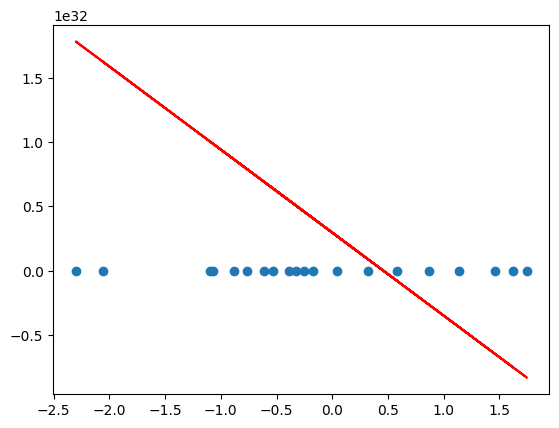

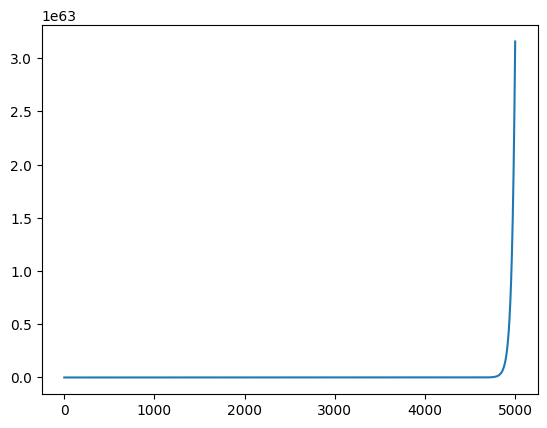

In [6]:
# Задание 2
steps, errors = hyp.fit(x, y, alpha=1.5625)
J = hyp.error(x, y)
print("error after gradient descent:", J)
hyp.plot(x, y)
hyp.plot_learning_curves()

In [7]:
# Задание 3
x1 = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)
a1, a2 = model.check(x1,y)
type(x1), "to", type(a1)

(pandas.core.frame.DataFrame, 'to', pandas.core.series.Series)

In [8]:
task_4 = """ Задание 4

if abs(prev_cost - cost) < accuracy:
                print(f"Reached desired accuracy after {steps} steps")
                break
"""

In [9]:
task_5 = """ Задание 5
в данной реализации алгоритма градиентного спуска он завершается всегда
либо при достижении заданной точности accuracy,
либо при достижении максимального количества шагов max_steps."""

In [21]:
class Task6(LinearRegression):
    def fit(self, X, Y, alpha=10.555, accuracy=0.01, max_steps=5000):
        X, Y = self.check(X, Y)
        self.b0 = 0
        self.b1 = 0
        step = 0
        self.steps = []
        prev_err = self.error(X, Y)
        errors = [prev_err]
        print(errors)
        while step < max_steps:
            self.b0 -= alpha * np.mean(self.predict(X) - Y)
            self.b1 -= alpha * np.mean((self.predict(X) - Y) * X)
            new_err = self.error(X, Y)
            print("ne",new_err)
            errors.append(new_err)
            print(new_err - prev_err > 0)
            #print(prev_err,new_err)
            if new_err > prev_err:
                errors.remove(prev_err)
                print(errors,1)
                alpha /= 2
                print("alpha", alpha)
                prev_err = new_err
                self.b0 = 0
                self.b1 = 0
                continue
            if abs(prev_err - new_err) < accuracy:
                print(f"Reached desired accuracy after {step} steps")
                break
            prev_err = new_err
            step += 1
            self.steps.append(step)
        if step == max_steps:
            print("Reached maximum number of steps")
        self.err = errors.copy()
        return self.steps, errors


[2937.6446095153397]
ne 305900.1308568764
True
[305900.1308568764] 1
alpha 5.2775
ne 76337.64257935018
False
ne 1710031.1886740644
True
[305900.1308568764, 1710031.1886740644] 1
alpha 2.63875
ne 13910.391877010386
False
ne 61329.36936887447
True
[305900.1308568764, 1710031.1886740644, 61329.36936887447] 1
alpha 1.319375
ne 1157.2014405006237
False
ne 427.6148672487681
False
ne 147.1762262702177
False
ne 48.152845836032995
False
ne 15.233287330180278
False
ne 4.7138306558490495
False
ne 1.437646250652309
False
ne 0.4342845715196442
False
ne 0.13036091015282916
False
ne 0.038966972734414684
False
ne 0.011615395204772583
False
ne 0.003455929149965191
False
Reached desired accuracy after 13 steps
error after gradient descent: 0.003455929149965191


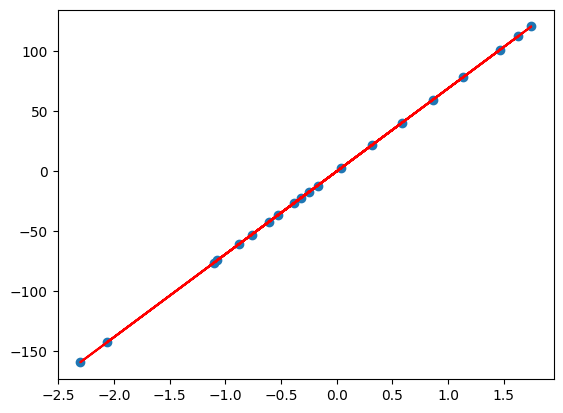

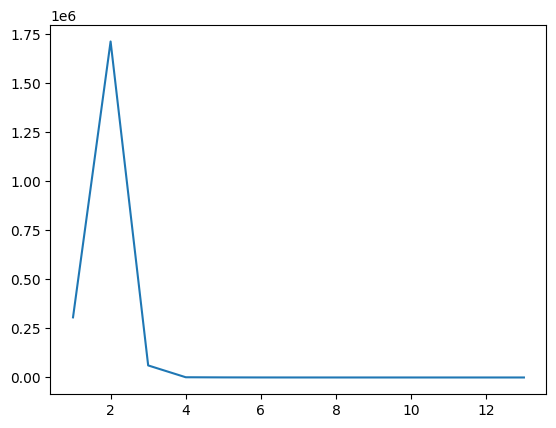

In [22]:
# Создание объекта модели
model = Task6()

# Обучение модели
steps, errors = model.fit(x, y)

#Ошибки
J = model.error(x, y)
print("error after gradient descent:", J)

# Предсказание значений на тестовых данных
y_pred = model.predict(x)

# Построение графика
model.plot(x, y)

# Построение кривых обучения

model.plot_learning_curves()



In [12]:
task_7=""" Задание 7

def plot(self, X, Y):
        X, Y = self.check(X, Y)
        Y_pred = self.predict(X)
        plt.scatter(X, Y)
        plt.plot(X, Y_pred, color='red')
        plt.show()

def plot_learning_curves(self):
    plt.plot(self.cost_history)
    plt.show()
"""